In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

#%matplotlib notebook

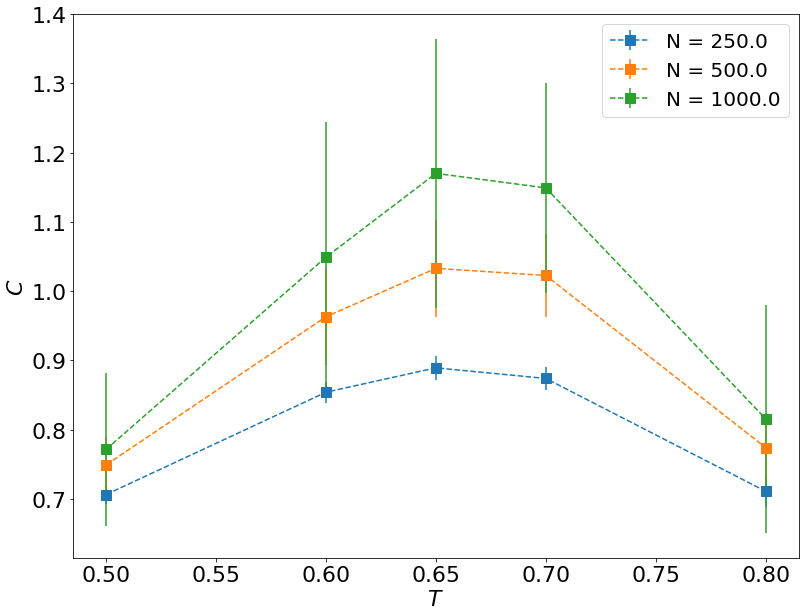

In [2]:
data_np = np.loadtxt("Homopolymer_simulations/hcap.conformations.dat", skiprows=1)


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
 
for l in lengths:
    data_l = data_np[data_np[:,0]==l]
 
    J_l = data_l[:,1]
    
    heat = data_l[:,4]#*np.square(J_l) 
 
    errs = data_l[:,5]#*np.square(J_l) 

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l, heat, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(0.58)
 

plt.legend(loc="best", fontsize=20)
 

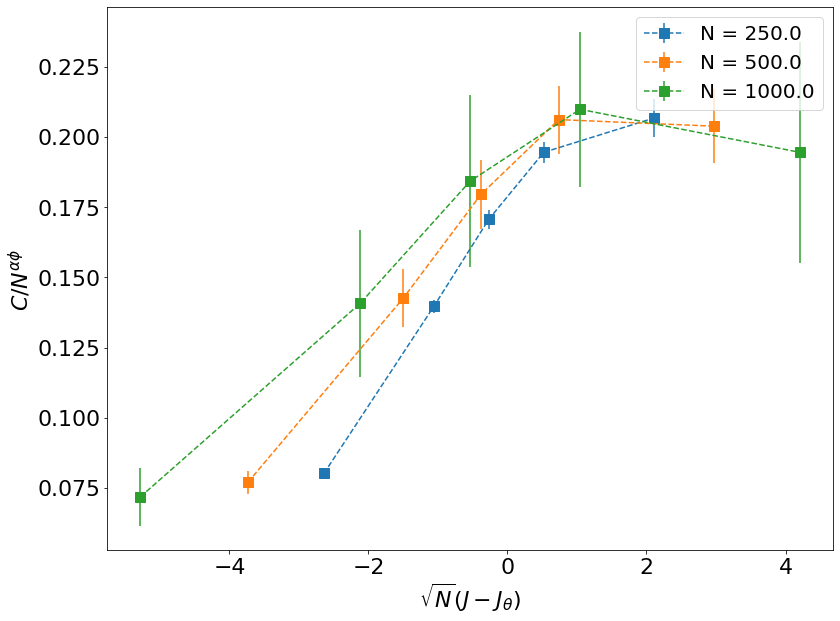

In [11]:
data_np = np.loadtxt("Homopolymer_simulations/hcap.conformations.dat", skiprows=1)

Jc = 0.667
 
    
#из книги про блуждания 
alpha = 1/3 
fc = 3/7#0.48

alpha_fc = alpha*fc

lengths = np.unique(data_np[:, 0])

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
 
for l in lengths:
 

    L = l
    data_l = data_np[data_np[:,0]==l]
 
    J_l = data_l[:,1]
    
    heat = data_l[:,4]*J_l*J_l
 
    errs = data_l[:,5]*J_l*J_l 

    x = J_l-Jc

    
    y = heat/np.power(L, alpha_fc)
    
    errs = errs/np.power(L, alpha_fc)
        
    #использую корень на оси OX
    plt.errorbar(x*np.sqrt(L), y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
 
plt.xlabel(r'$ \sqrt{N} (J-J_{\theta}) $', fontsize = 22)
plt.ylabel(r"$ C / N ^{ \alpha \phi}$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
 

plt.legend(loc="best", fontsize=20)
 

### Из Беретти-Сокаля 


Ошибок нет, так как это файлы распределений 

Text(0.5, 1.0, ' ')

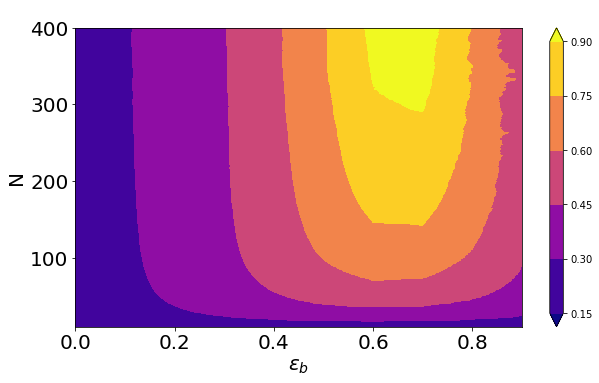

In [12]:
nmin = 10
nmax = 400

data = np.zeros(( nmax-nmin+1, 10, 11 ))

 
for i in range(10):
    filename = "Homopolymer_simulations/Main_simulations/counts_isaw_moresteps_"+str(i/10)+"00000_higher_hpc.txt"
    #currentdata = np.genfromtxt(file, max_rows = 6, missing_values = "" )
    filedata = np.loadtxt(filename, skiprows=9) 
    for N in range(nmin, nmax+1):
        currentdata=filedata[filedata[:,0]==N] 
        #currentdata[:,1]= currentdata[:,1]/(N+1)  
        
 
        data[N-nmin, i, 0] = np.sum(currentdata[:,1]/(N+1)*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i, 2] = np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2]/(N+1)/(N+1))/np.sum(currentdata[:,2])
    
        data[N-nmin, i, 4] = np.sum((currentdata[:,1]/(N+1))**4*currentdata[:,2])/np.sum(currentdata[:,2])
 
        data[N-nmin, i, 6] = 1.0 - data[N-nmin, i, 2]/3.0/data[N-nmin, i, 0]/data[N-nmin, i, 0]
 
        data[N-nmin, i, 8] = 1.0 - data[N-nmin, i, 4]/3.0/data[N-nmin, i, 2]/data[N-nmin, i, 2]
 
        meanm =  np.sum(currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        meanmsq =  np.sum(currentdata[:,1]*currentdata[:,1]*currentdata[:,2])/np.sum(currentdata[:,2])
        #data[N-nmin, i-21, 10] = (100+i)/100.0*(100+i)/100.0 * (meanmsq - meanm*meanm)
 
      
        j = i/10
        data[N-nmin, i, 10] = (meanmsq - meanm*meanm)/N 
        
#heat capacity 

x = np.arange(nmin, nmax+1)
y = np.arange(0, 10)/10.0
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10,5.5))
plt.contourf(y, x,  data[:,:,10] ,extend='both', cmap = "plasma")
plt.xlabel(r"$\epsilon_b$", fontsize=20)
plt.ylabel("N", fontsize=20)
plt.tick_params(axis='x', labelsize=20) 
plt.tick_params(axis='y', labelsize=20) 
plt.colorbar()
plt.title(' ', fontsize=20)

In [5]:
lengths = [50, 75, 95,100, 125, 150, 200, 250, 300, 350  ]
#lengths = np.array([200, 205, 210, 215, 220]) + 30

#lengths = np.arange(250, 260)-5

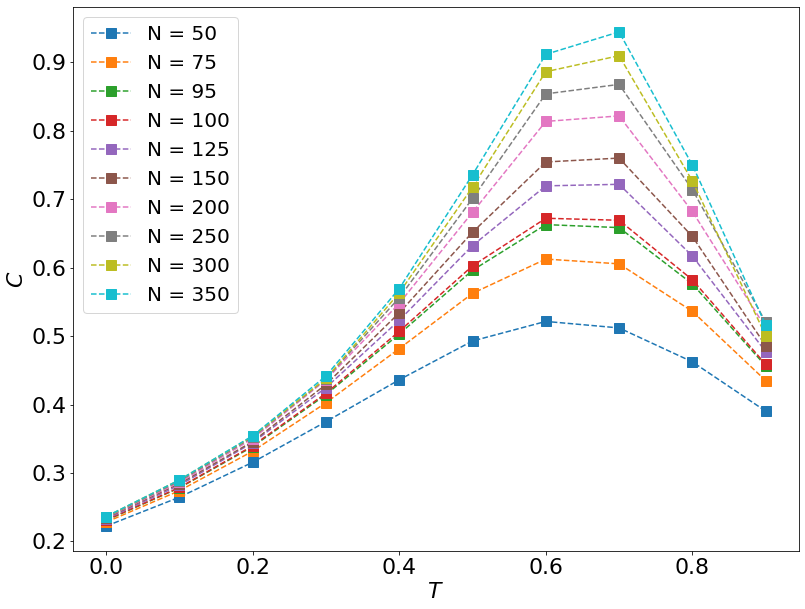

In [6]:
 
J_l = y
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
 
for l in lengths:

    heat = data[l-nmin,:,10] 
 
     
    plt.plot(J_l, heat, "s--", ms = 10, label = "N = " + str(l))
 
plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 

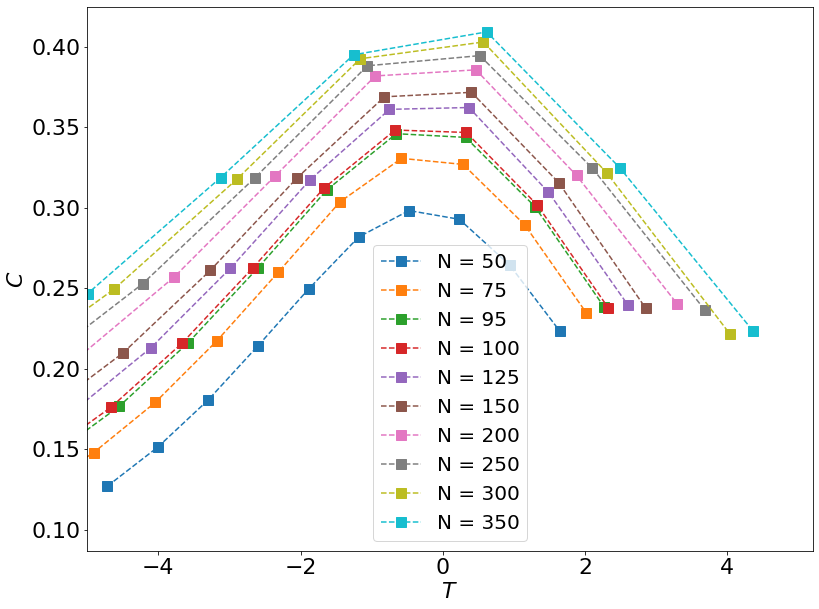

In [7]:
 
J_l = y
 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Jc = 0.667
 
    
#из книги про блуждания 
alpha = 1/3 
fc = 3/7
alpha_fc = alpha*fc



for l in lengths:

    L = l
    
    heat = data[l-nmin,:,10] 

    y = heat/np.power(L, alpha_fc)
    
    x = J_l-Jc 
 
     
    #снова корень 
    plt.plot(x*np.power(L,1/2), y, "s--", ms = 10, label = "N = " + str(l))
 
plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.xlim(-5)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)


# Ising on SAW 

In [8]:
def peak_heat(n, alphafc, a):
    return a*np.power(n, alphafc)
    #return a*np.log(-n)

In [9]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])

J = 0.83 

 
data_83 = data_np[data_np[:,1]==J]


data_83 = data_83[data_83[:,0]>200]


ns = data_83[:, 0]

nu = 1.94235
ns = np.power(ns, 1/nu)

J_l =  data_83[:, 1]
heat_data = (data_83[:,9] - data_83[:,7]*data_83[:,7])*l*J_l*J_l
 
    
errs =  data_83[:,10]*data_83[:,10] + 4*data_83[:,8]*data_83[:,8]*data_83[:,7]*data_83[:,7]
errs = np.sqrt(errs)


popt, pcov = curve_fit(peak_heat, ns, heat_data, sigma=errs, absolute_sigma=False )  

perr = np.sqrt(np.diag(pcov))

popt

array([ -1.25875645, 114.68571871])

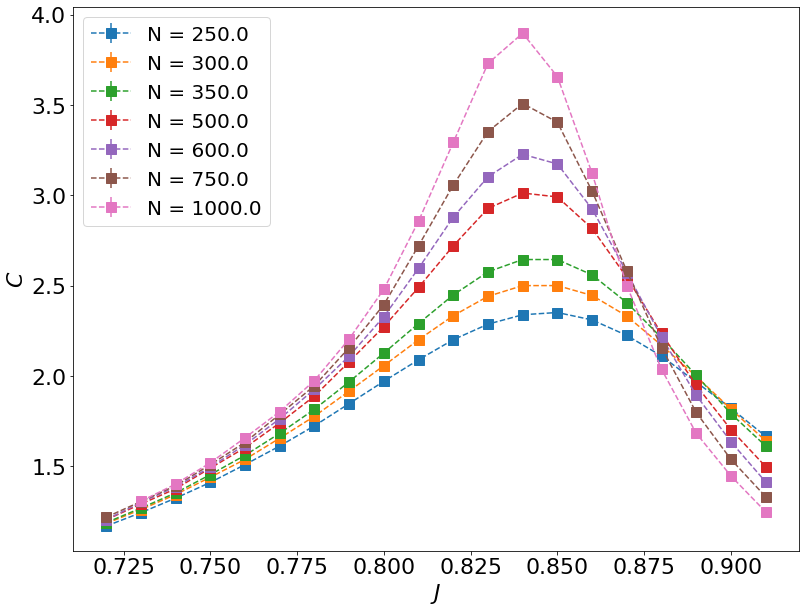

In [10]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
 
lengths = np.unique(data_np[:, 0])

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
for l in lengths:
    if (l<250):
        continue
     
    data_l = data_np[data_np[:,0]==l]
    
    J_l = data_l[:, 1]
    

    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*l*np.square(J_l)
    

    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    
    errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l, y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 
    
#plt.savefig("/home/kamilla/Lattice_models/img/canonical_c.png")

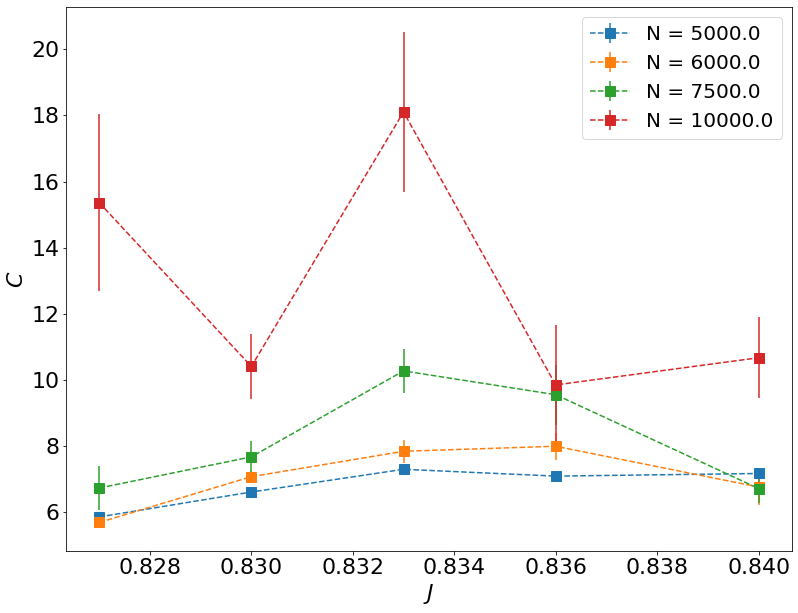

In [11]:
data_np = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.835
 
 
gamma = 9/3.5
nu= 3.5
power = -gamma/nu


 
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    #errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l, y, yerr=errs*np.square(J_l)*l, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)

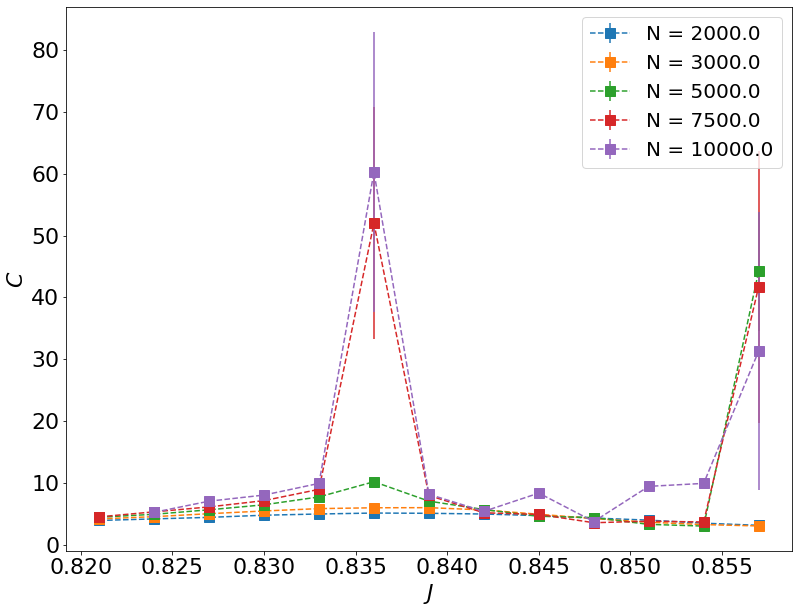

In [12]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.835
 
 
gamma = 9/3.5
nu= 3.5
power = -gamma/nu


 
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    #errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l, y, yerr=errs*np.square(J_l)*l, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)


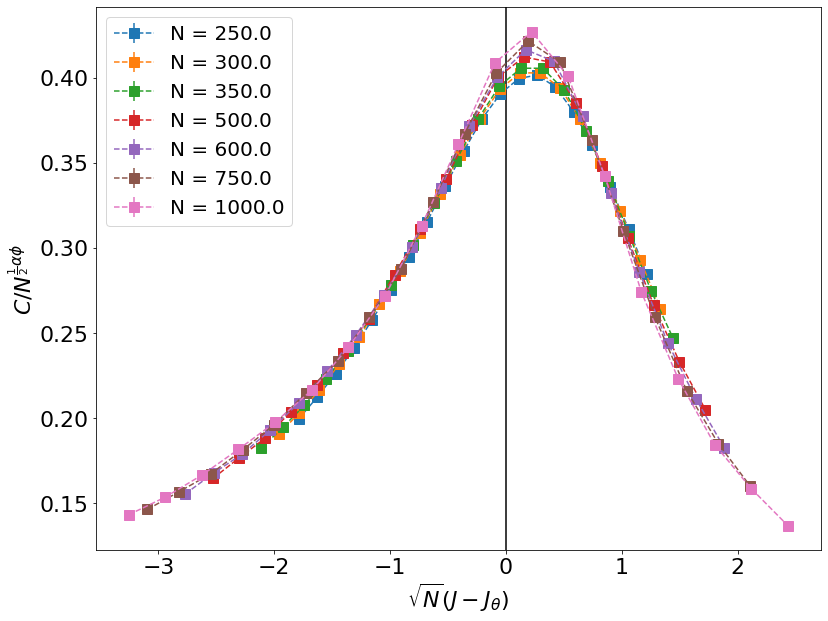

In [13]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.833
 
Tc = 0.833

 
nu=1

 
alpha = -1/3 
fc = 3/7
power = alpha*fc
 

power = -3/4

power = -0.64#popt[0]

for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*l*J_l*J_l
    
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2*np.power(L, power)
    
    
    #errs = data_l[:,16]*y
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    errs = errs*np.power(L, power)

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(x*np.power(L, 1/nu), y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$ \sqrt{N} (J-J_{\theta}) $', fontsize = 22)
plt.ylabel(r"$ C / N ^{\frac{1}{2} \alpha \phi}$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 
    

#plt.savefig("/home/kamilla/Lattice_models/img/canonical_cscaled.png")

In [14]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])

J = 0.833


data_83 = data_np[data_np[:,1]==J]


data_83 = data_83[data_83[:,0]>200]


ns = data_83[:, 0]
   
heat_data = (data_83[:,9] - data_83[:,7]*data_83[:,7])*l*J*J
 
    
errs =  data_83[:,10]*data_83[:,10] + 4*data_83[:,8]*data_83[:,8]*data_83[:,7]*data_83[:,7]
errs = np.sqrt(errs)


popt, pcov = curve_fit(peak_heat, ns, heat_data, sigma=errs, absolute_sigma=False )  

perr = np.sqrt(np.diag(pcov))

popt

array([ -0.54979012, 161.67757266])

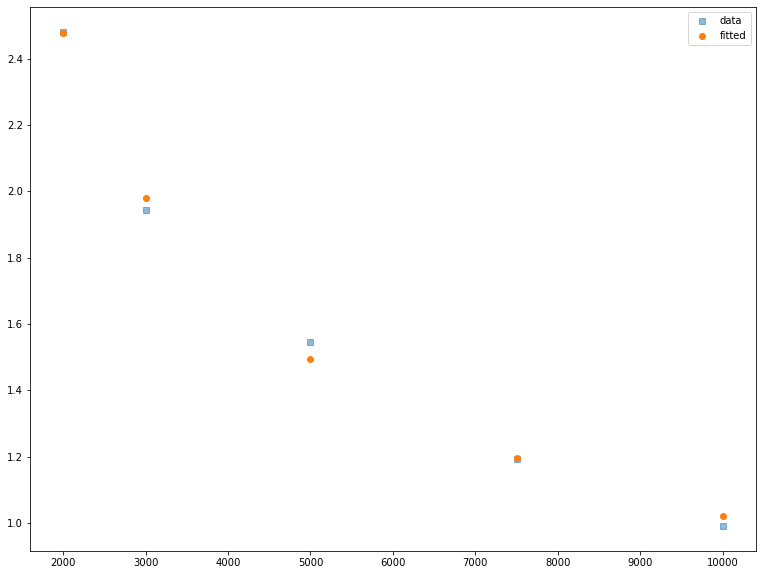

In [15]:
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


plt.plot(ns, heat_data, "s", alpha = 0.5, label = "data")


plt.plot(ns, peak_heat(ns, popt[0], popt[1] ), "o", label = "fitted")


plt.legend()

In [16]:
def der_U(dL, nu, c):
    
    return c*np.power(dL, 1/nu)

In [18]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=0)
data_np = data_np[data_np[:,1]<0.86]
data_np = data_np[data_np[:,1]>0.811]
#l = 5000
lengths =  np.unique(data_np[:, 0])
ls = []
#data_l = data_np[data_np[:,0]==l]
#data_l = data_l[data_l[:,1]==0.836]

n = len(data_l)

all_dbc = []
for l in lengths:
    if (l<150):
        continue
 
    data_l = data_np[data_np[:,0]==l]
    bc = []
    n = len(data_l)
    for i in range(1, n):
        bc1 = 1 - data_l[i,17]/3/data_l[i,15]/data_l[i,15]
        bc0 = 1 - data_l[i-1,17]/3/data_l[i-1,15]/data_l[i-1,15]
        bc.append(bc1-bc0)
    all_dbc.append(bc)
    ls.append(l)
    
all_dbc = np.array(all_dbc)
popt, pcov = curve_fit(der_U, ls, all_dbc[:, 2], absolute_sigma=False )  

perr = np.sqrt(np.diag(pcov))

popt

array([1.52456109e+00, 1.09163602e-03])

In [19]:
data_np = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)

 
#l = 5000
lengths = np.unique(data_np[:, 0])
        
#data_l = data_np[data_np[:,0]==l]
#data_l = data_l[data_l[:,1]==0.836]

n = len(data_l)

all_dbc = []
for l in lengths:
    print(l)
    data_l = data_np[data_np[:,0]==l]
    bc = []
    n = len(data_l)
    for i in range(1, n):
        bc1 = 1 - data_l[i,17]/3/data_l[i,15]/data_l[i,15]
        bc0 = 1 - data_l[i-1,17]/3/data_l[i-1,15]/data_l[i-1,15]
        bc.append( (bc1-bc0)/(data_l[i,1]-data_l[i-1,1]))
    all_dbc.append(bc)
    
all_dbc = np.array(all_dbc)
all_dbc

5000.0
6000.0
7500.0
10000.0


array([[19.43832144, 41.61960945, 39.6626457 , 30.11273238],
       [21.30622433, 29.48646971, 56.73047267, 28.68740615],
       [31.0471158 , 37.27699003, 53.4450866 , 40.51116445],
       [16.82288026, 44.64948163, 58.0821014 , 46.00142494]])

In [20]:

popt1, pcov1 = curve_fit(der_U, lengths, all_dbc[:,2], absolute_sigma=False )  

perr1 = np.sqrt(np.diag(pcov1))

popt1

array([2.59372901, 1.71405888])

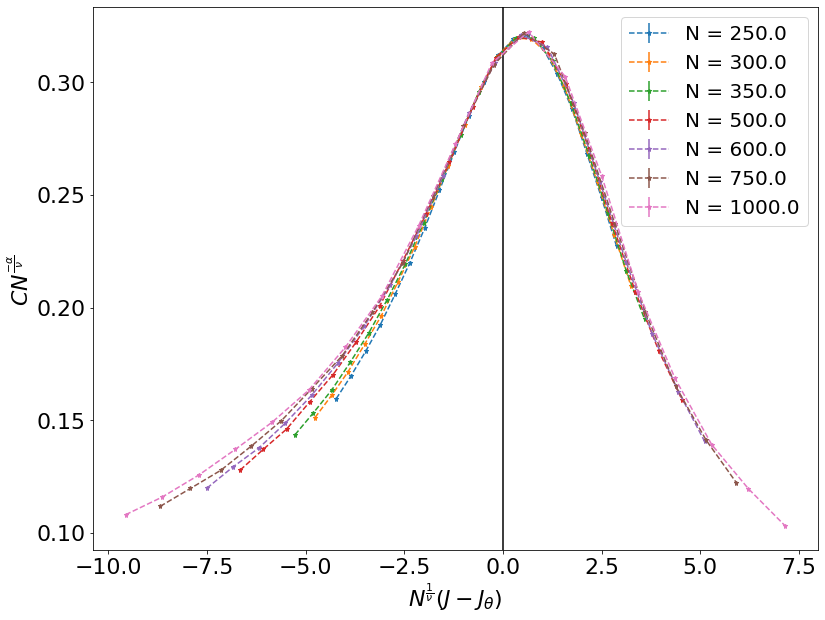

In [53]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.833

nu = 1.94235
#nu = 1.6002
nu =1.524561
#nu = 7/4
#nu = 1.15
#nu = 5.5899
power = popt[0]#*fc
power = -0.690
power = 0.55

for l in lengths:
    
    if (l<250):
        continue
    
    #L = np.sqrt(l)
    #L = np.power(l, 4/7)
    L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    #m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*l*J_l*J_l
    
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
 
    
    #nu = 1.9
    
    #nu = 2
    y = m2*np.power(L, -power/nu)
    
    
    #errs = data_l[:,16]*y
    
    errs =  data_l[:,10]*data_l[:,10] + 4*data_l[:,8]*data_l[:,8]*data_l[:,7]*data_l[:,7]
    errs = errs*np.power(L, power)

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    L = l 
    plt.errorbar(x*np.power(L, 1/nu), y, yerr=errs, fmt="*--", ms = 5, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
#plt.xlabel(r'$ \sqrt{N} (J-J_{\theta}) $', fontsize = 22)
plt.xlabel(r'$ N ^{\frac{1 }{\nu}  } (J-J_{\theta}) $', fontsize = 22)
#plt.ylabel(r"$ C / N ^{\frac{1}{2} \alpha \phi}$ ", fontsize=22)
plt.ylabel(r"$ C N ^{\frac{-\alpha}{\nu}  }$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 
    

plt.savefig("/home/kamilla/Lattice_models/img/canonical_cscaled.png")

-0.3352380952380952


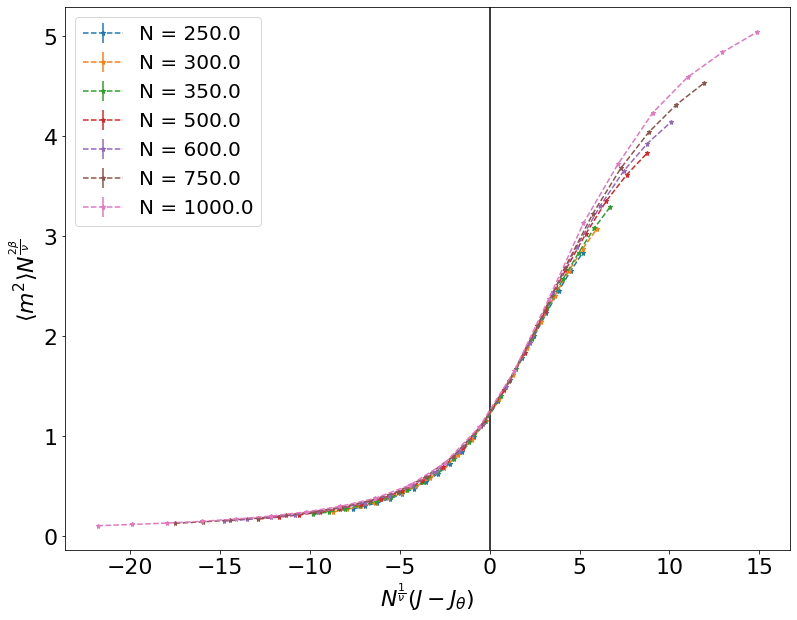

In [47]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=0)
#data_np = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.833
 
 
nu = 2
 
nu = 1.9423
 
 
gamma = 0.4010
gamma = 0.326

nu = 1.524561
gamma =0.4602
gamma = 0.44
gamma = 0.28
nu = 1.3
nu = 8/7#1.15
#gamma = 0.12
nu = 42/32#2


#nu = 8/7
gamma = -0.44/(42/32)

 
print(gamma)
for l in lengths:
    
    if (l<250):
        continue
    
    #L = np.sqrt(l)
    L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    m2 = data_l[:,15] 
    
    x = np.abs(J_l-Tc)
    
    x = (J_l-Tc)*np.power(L, 1/nu)
    #y = m2/J_l*np.power(L, -8/7)
    
    y = m2*np.power(L, -gamma/nu) 
    
    
    
    errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar( x, y, yerr=errs, fmt="*--", ms = 5, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
    
plt.axvline(x=0, c="k" )


plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ m^2  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)
#plt.xlabel(r'$ \sqrt{N} (J-J_{\theta}) $', fontsize = 22)
plt.xlabel(r'$ N ^{\frac{1 }{\nu}  } (J-J_{\theta}) $', fontsize = 22)
#plt.ylabel(r"$ C / N ^{\frac{1}{2} \alpha \phi}$ ", fontsize=22)
plt.ylabel(r"$ \langle m^2 \rangle N ^{\frac{2 \beta }{\nu}  }$ ", fontsize=22)
#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
plt.savefig("/home/kamilla/Lattice_models/img/canonical_maglongscaled.png")

-0.026923076923076925
-0.3352380952380952


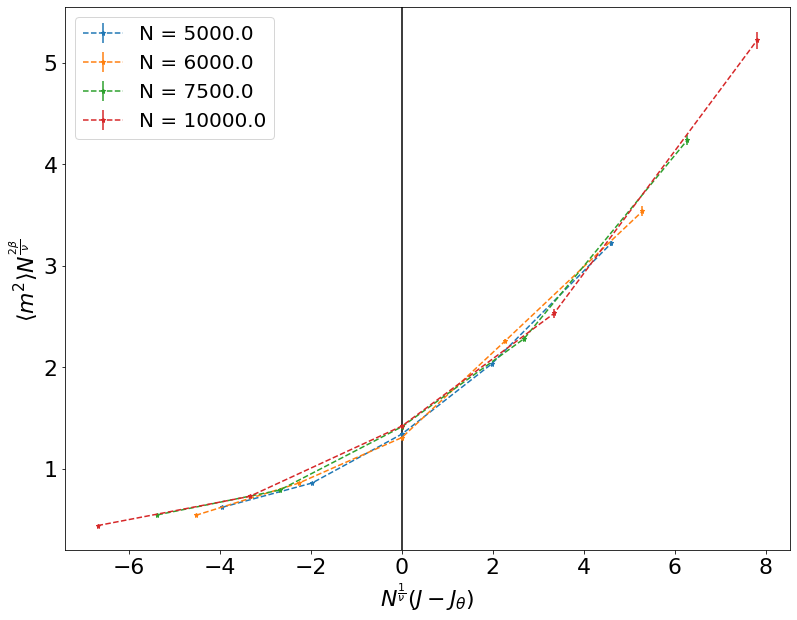

In [48]:
 
data_np = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 0.833
 
 
print(power)

 
nu = 2
 
nu = 1.9423

gamma = 0.4010
gamma = 0.326

nu = 1.524561
gamma =0.4602
gamma = 0.44
gamma = 0.28
nu = 1.3
nu = 8/7#1.15
#gamma = 0.12
nu = 42/32#2


nu = 42/32#2


#nu = 8/7
gamma = -0.44/(42/32)

 
print(gamma)
for l in lengths:
    
    if (l<250):
        continue
    
    #L = np.sqrt(l)
    L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    m2 = data_l[:,15] 
    
    x = np.abs(J_l-Tc)
    
    x = (J_l-Tc)*np.power(L, 1/nu)
    #y = m2/J_l*np.power(L, -8/7)
    
    y = m2*np.power(L, -gamma/nu) 
    
    
    
    errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar( x, y, yerr=errs, fmt="*--", ms = 5, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
    
plt.axvline(x=0, c="k" )


plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ m^2  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)
#plt.xlabel(r'$ \sqrt{N} (J-J_{\theta}) $', fontsize = 22)
plt.xlabel(r'$ N ^{\frac{1 }{\nu}  } (J-J_{\theta}) $', fontsize = 22)
#plt.ylabel(r"$ C / N ^{\frac{1}{2} \alpha \phi}$ ", fontsize=22)
plt.ylabel(r"$ \langle m^2 \rangle N ^{\frac{2 \beta }{\nu}  }$ ", fontsize=22)
#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
plt.savefig("/home/kamilla/Lattice_models/img/canonical_maglongscaled1.png")

-0.026923076923076925


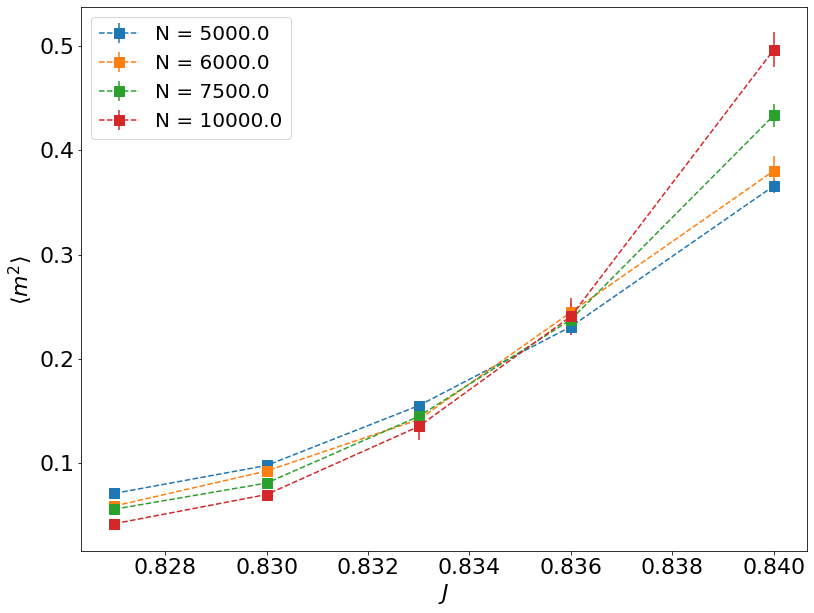

In [32]:
data_np = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 1/0.85
 
gamma = 7/4 # 7/4
nu = 65 #55  #7/1.5

 
power = -gamma/nu
 
print(power)
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    m2 = data_l[:,15] 
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    
    errs = data_l[:,16] 

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l, y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
plt.savefig("/home/kamilla/Lattice_models/img/canonical_maglong1.png")

-0.026923076923076925


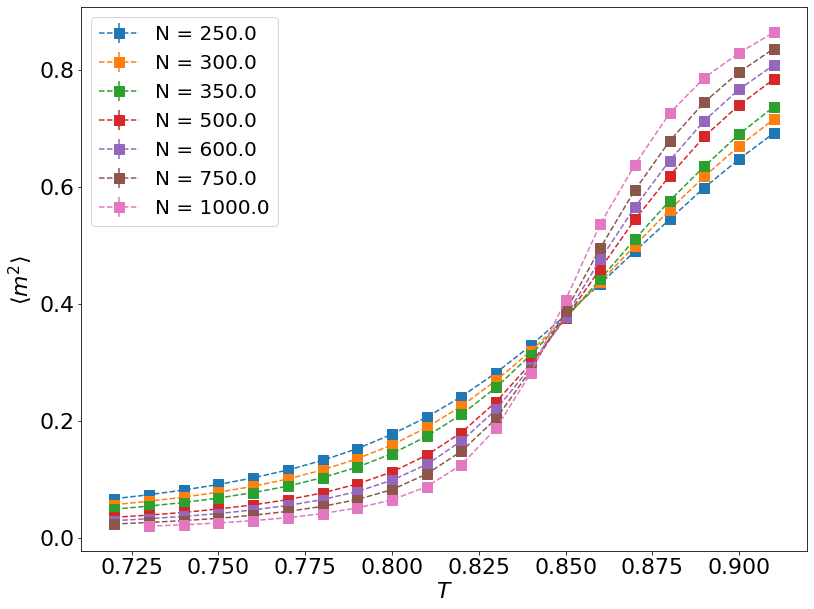

In [33]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 1/0.85
 
gamma = 7/4 # 7/4
nu = 65 #55  #7/1.5

 
power = -gamma/nu
 
print(power)
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    m2 = data_l[:,15] 
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    
    errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l  , y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
plt.savefig("/home/kamilla/Lattice_models/img/canonical_maglong.png")

In [26]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])

J = 0.83 

 
data_83 = data_np[data_np[:,1]==J]


data_83 = data_83[data_83[:,0]>200]


ns = data_83[:, 0]

nu = 1.94235
ns = np.power(ns, 1/nu)

J_l =  data_83[:, 1]
mag2_data =  data_83[:, 15]
 
    
errs =  data_83[:,16] 


popt, pcov = curve_fit(peak_heat, ns, mag2_data, sigma=errs, absolute_sigma=False )  

perr = np.sqrt(np.diag(pcov))

popt

array([-0.56191839,  1.39769308])

[0.54258267 4.89207712] [ 0.93851478 23.11808659]


<ipython-input-28-0f9299ee8cdb>:19: RuntimeWarning: divide by zero encountered in power
  popt, pcov = sco.curve_fit(lambda a,r,s : s*np.power(a, r), x, ydata)


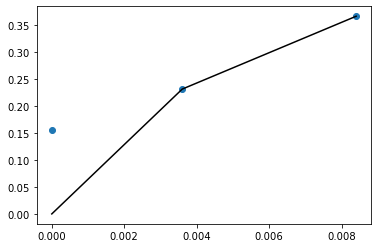

In [28]:
import scipy.optimize as sco

#data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
data_np = np.loadtxt("Ising/Main/longnear.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
 
dataset = data_np[data_np[:,0]==5000]
#dataset = dataset[dataset[:,1]<0.836]
dataset = dataset[dataset[:,1]>0.83]
J = 0.83 
tc = 0.833

x = np.abs(dataset[:,1] -  tc) / tc
 
x1 =  (dataset[:,1] -  tc) / tc
ydata = dataset[:,15]#*np.power(dataset[:,0], 1/nu)

popt, pcov = sco.curve_fit(lambda a,r,s : s*np.power(a, r), x, ydata)
perr = np.sqrt(np.diag(pcov)) #And compute its errors
plt.plot(x, ydata, marker = "o", ls="none", label = "Data")
print(popt, perr)
y = popt[1]*np.power(x, popt[0])
plt.plot(x,y,color="black", label="Fit")

[0.44400958 2.53647199] [0.01881212 0.12729819]


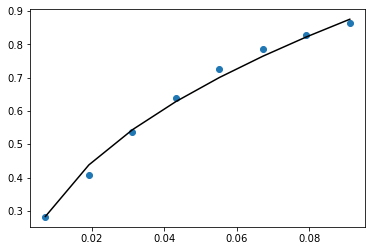

In [29]:
import scipy.optimize as sco

#data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
data_np = np.loadtxt("Ising/Main/longnear.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])

data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=0)
dataset = data_np[data_np[:,0]==1000]
#dataset = dataset[dataset[:,1]<0.88]
dataset = dataset[dataset[:,1]>0.83]
J = 0.83 
tc = 0.834

x = np.abs(dataset[:,1] -  tc) / tc
 
x1 =  (dataset[:,1] -  tc) / tc
ydata = dataset[:,15]#*np.power(dataset[:,0], 1/nu)

popt, pcov = sco.curve_fit(lambda a,r,s : s*np.power(a, r), x, ydata, sigma = dataset[:, 16], absolute_sigma=False)
perr = np.sqrt(np.diag(pcov)) #And compute its errors
plt.plot(x, ydata, marker = "o", ls="none", label = "Data")
print(popt, perr)
y = popt[1]*np.power(x, popt[0])
plt.plot(x,y,color="black", label="Fit")